# Pandas Plotting Cheat Sheet

Pandas built-in plotting is perfect for quick exploratory data analysis. It's a wrapper around matplotlib that understands DataFrames.

**Key Advantage**: Plots directly from DataFrame with minimal code
**When to use**: Quick exploration, not final presentation plots


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for examples
df = pd.DataFrame({
    'A': np.random.randn(100).cumsum(),
    'B': np.random.randn(100).cumsum(),
    'C': np.random.randn(100).cumsum(),
    'Category': np.random.choice(['X', 'Y', 'Z'], 100),
    'Values': np.random.randint(1, 100, 100)
})


## 2. Quick Plot Types with .plot()

The `.plot()` method is incredibly versatile. Use the `kind` parameter to specify plot type:


<Axes: ylabel='Density'>

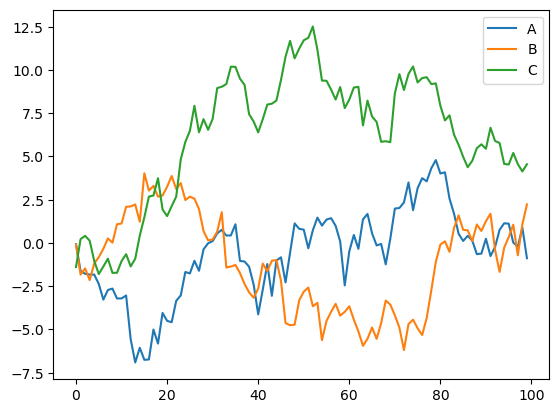

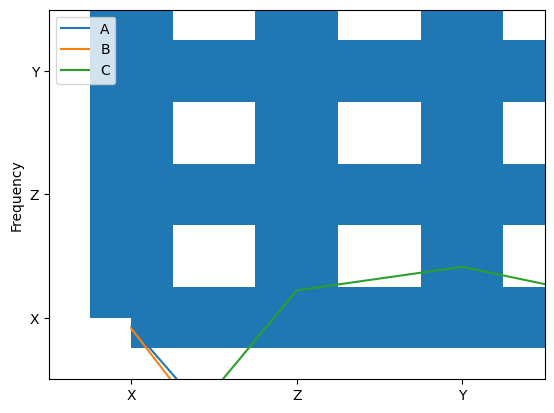

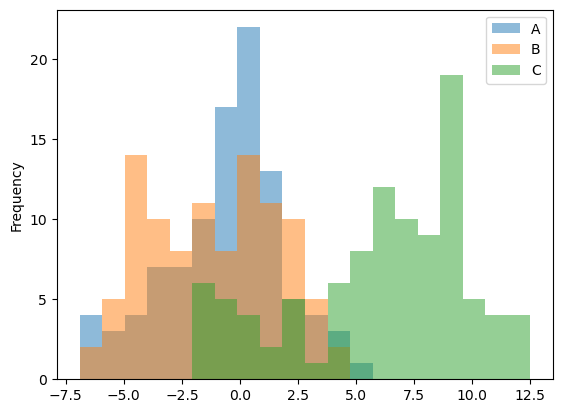

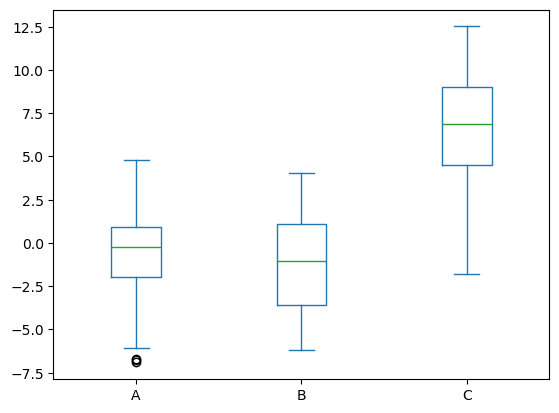

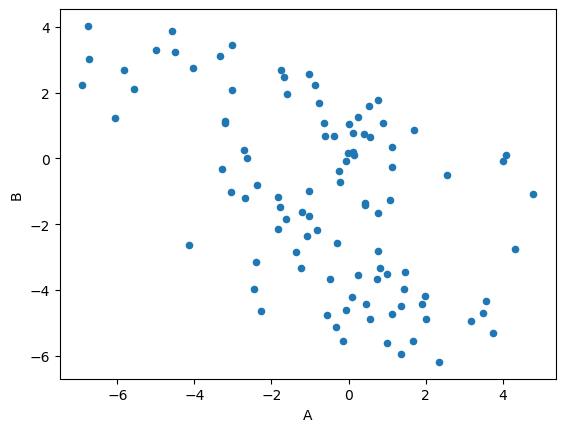

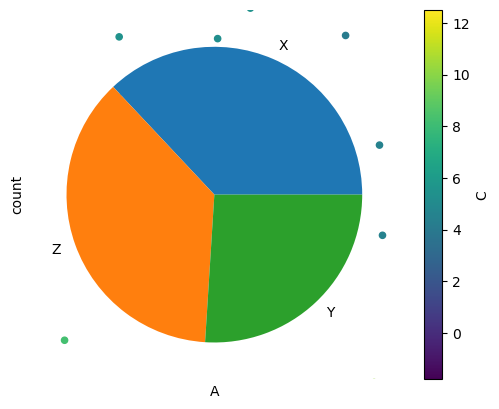

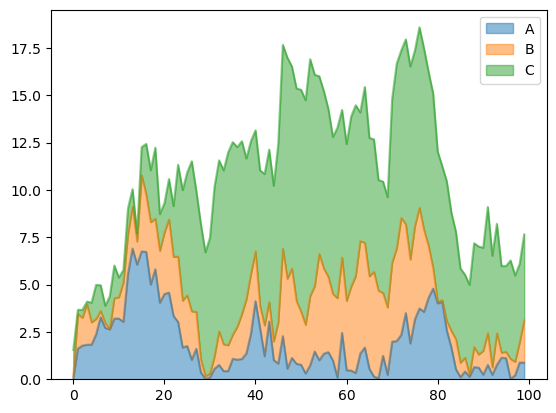

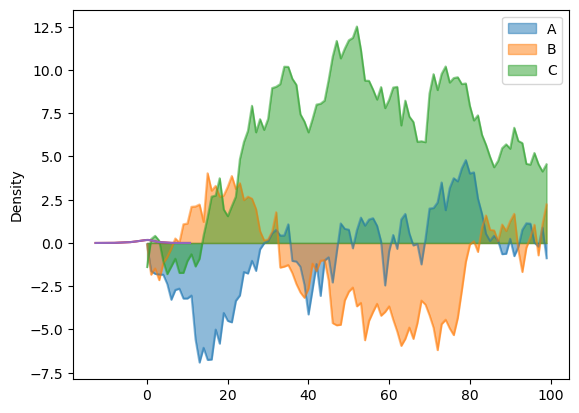

In [ ]:
# Line plot (default)
df[['A', 'B', 'C']].plot()
# or
df[['A', 'B', 'C']].plot(kind='line')

# Bar plot
df['Category'].value_counts().plot(kind='bar')
df['Category'].value_counts().plot(kind='barh')  # Horizontal

# Histogram
df['Values'].plot(kind='hist', bins=20)
df[['A', 'B', 'C']].plot(kind='hist', alpha=0.5, bins=20)  # Multiple

# Box plot
df[['A', 'B', 'C']].plot(kind='box')

# Scatter plot
df.plot(kind='scatter', x='A', y='B')
df.plot(kind='scatter', x='A', y='B', c='C', colormap='viridis')  # With color

# Pie chart
df['Category'].value_counts().plot(kind='pie')

# Area plot
df[['A', 'B', 'C']].abs().plot(kind='area', alpha=0.5)
df[['A', 'B', 'C']].plot(kind='area', alpha=0.5, stacked=False)


<Axes: ylabel='Density'>

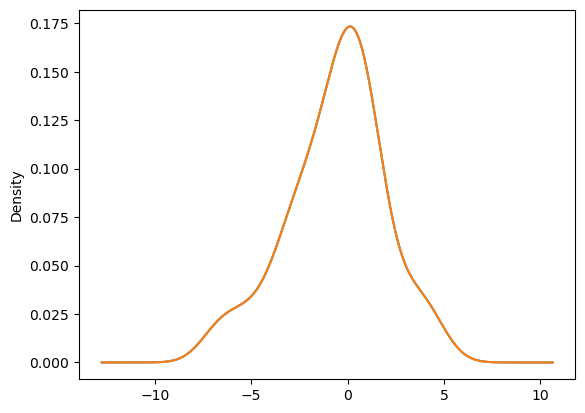

In [11]:
# Density plot (KDE)
df['A'].plot(kind='density')
# or
df['A'].plot.density()

## 3. Direct Plot Methods

You can also use direct methods instead of `kind` parameter:


<Axes: xlabel='A', ylabel='B'>

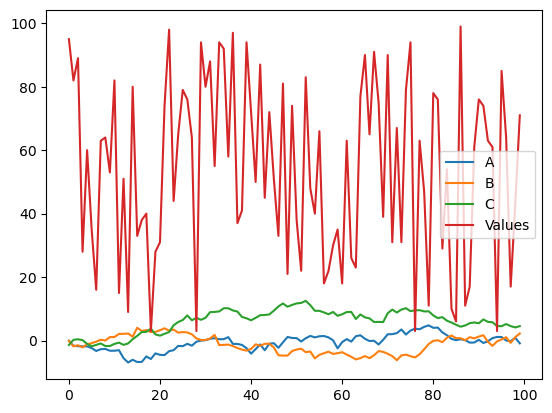

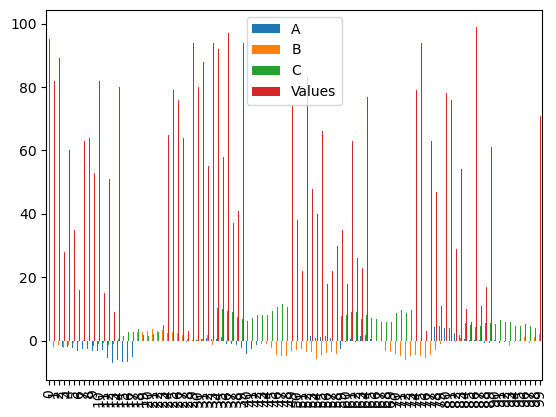

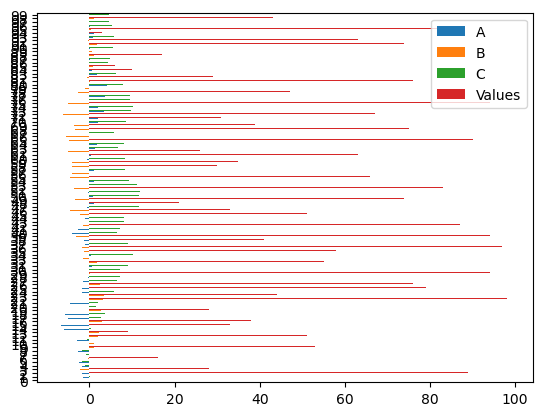

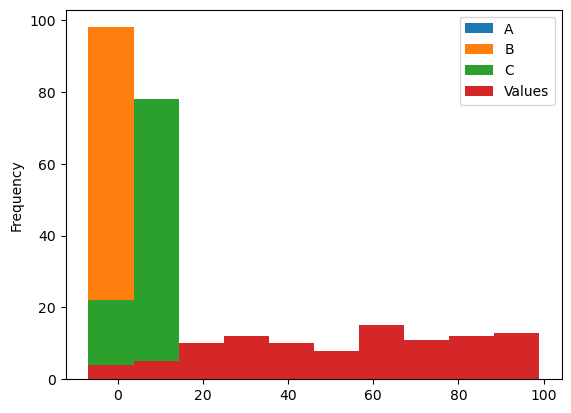

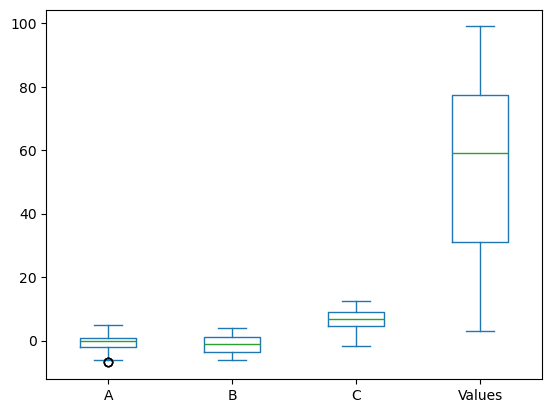

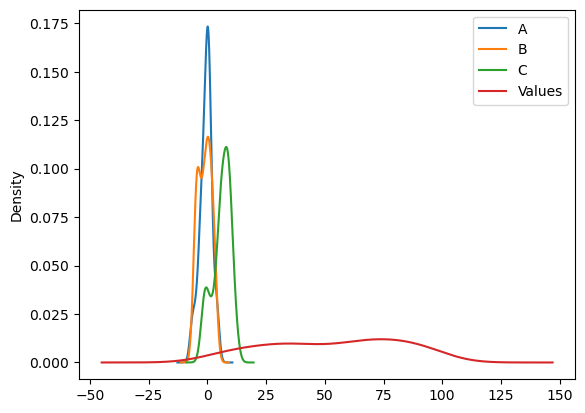

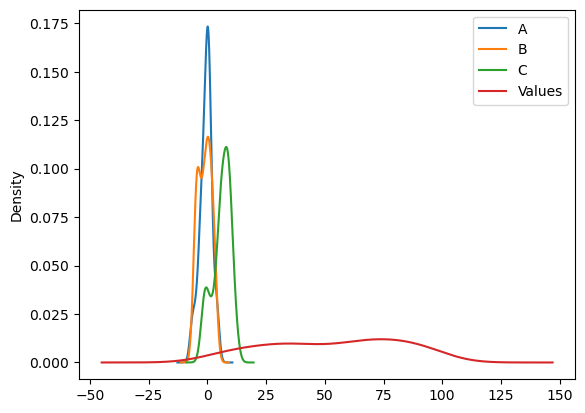

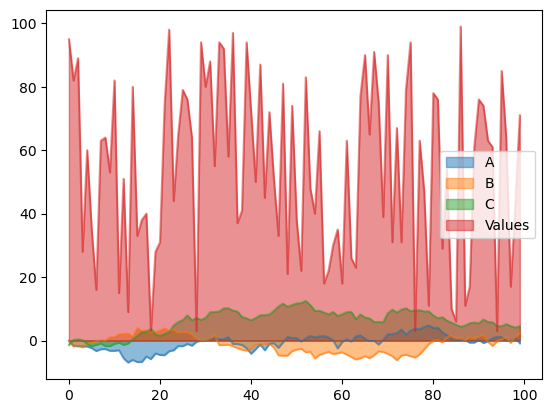

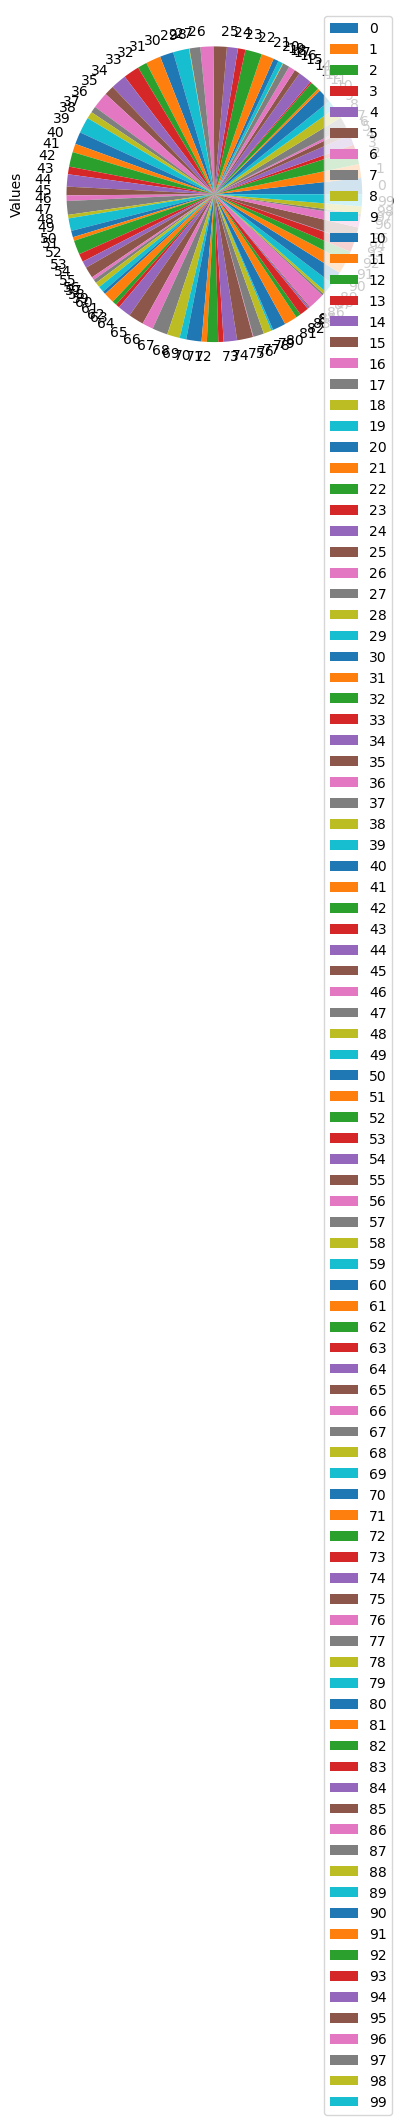

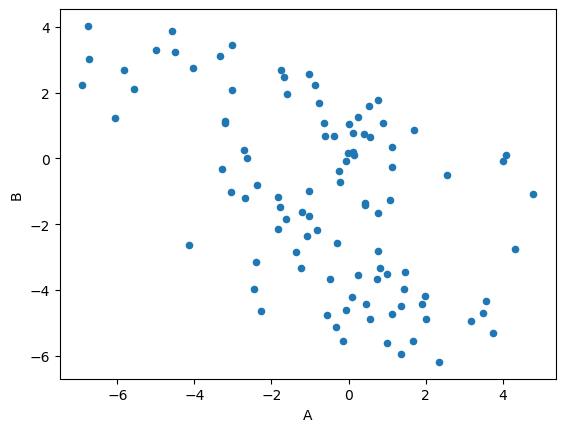

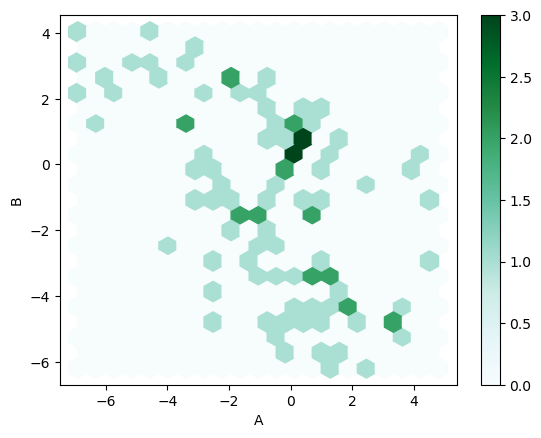

In [19]:
# Direct method syntax
df.plot.line()
df.plot.bar()
df.plot.barh()
df.plot.hist()
df.plot.box()
df.plot.kde()
df.plot.density()
df.plot.area(stacked=False) 
df.plot.pie(y='Values')
df.plot.scatter(x='A', y='B')
df.plot.hexbin(x='A', y='B', gridsize=20) # For large datasets


## 4. Common Parameters for All Plot Types

```python
df.plot(
    # Data selection
    x='column_name',        # X-axis data
    y='column_name',        # Y-axis data
    
    # Appearance
    figsize=(10, 6),        # Figure size
    title='Plot Title',     # Title
    legend=True,            # Show legend
    grid=True,              # Show grid
    
    # Styling
    style='.-',             # Line style
    color='red',            # Color (single)
    colormap='viridis',     # Colormap (multiple series)
    alpha=0.7,              # Transparency
    
    # Axes
    xlim=(0, 100),          # X-axis limits
    ylim=(0, 100),          # Y-axis limits
    logy=True,              # Log scale on y-axis
    logx=True,              # Log scale on x-axis
    
    # Other
    subplots=True,          # Separate subplots for each column
    layout=(2, 2),          # Subplot layout
    sharex=True,            # Share x-axis
    sharey=True,            # Share y-axis
    ax=ax,                  # Plot on specific axes
)
```


## 5. Time Series Plotting

Pandas excels at time series visualization:


<Axes: >

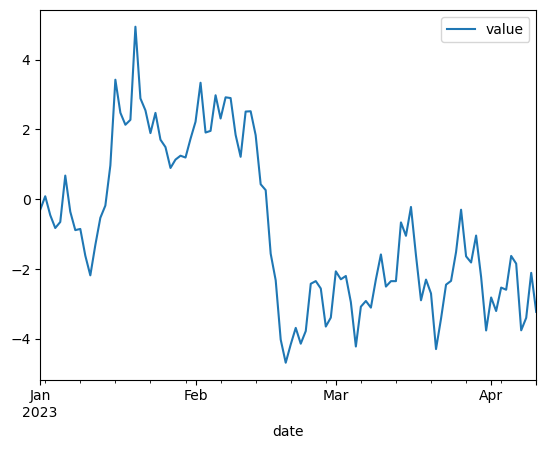

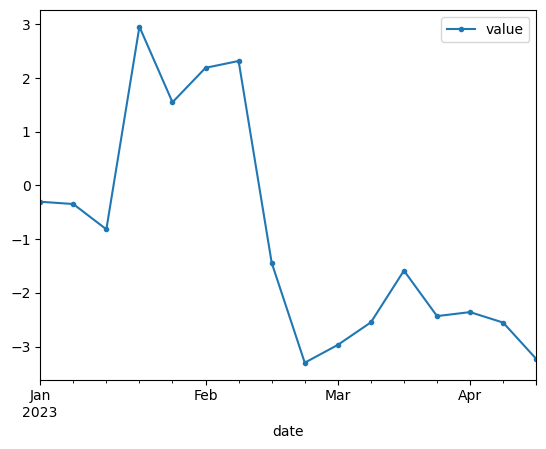

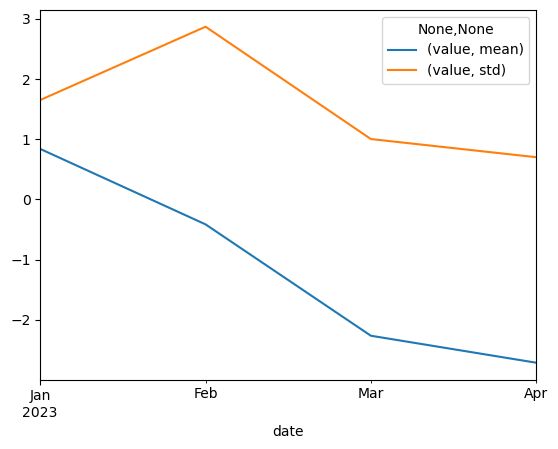

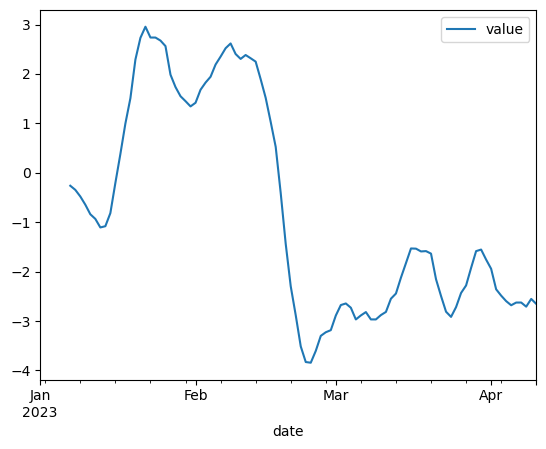

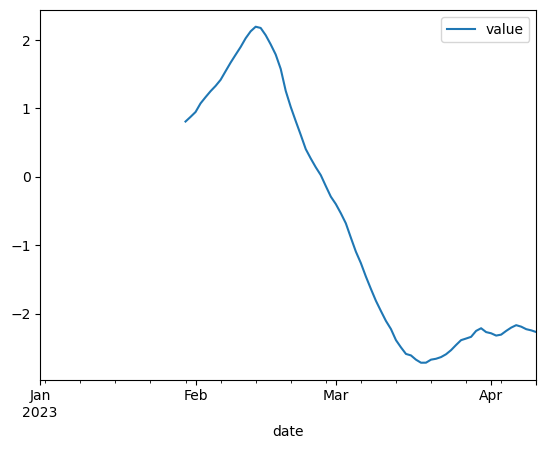

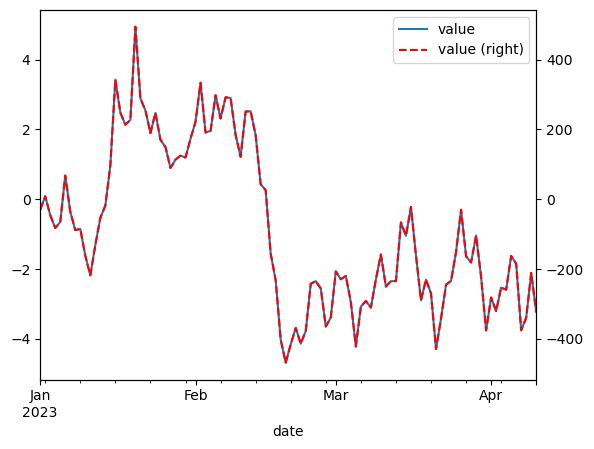

In [21]:
# Create time series data
dates = pd.date_range('2023-01-01', periods=100, freq='D')
ts_df = pd.DataFrame({
    'value': np.random.randn(100).cumsum(),
    'date': dates
})
ts_df.set_index('date', inplace=True)

# Simple time series plot
ts_df.plot()

# Resample and plot
ts_df.resample('W').mean().plot(style='.-')  # Weekly average
ts_df.resample('ME').agg(['mean', 'std']).plot()  # Monthly stats

# Rolling statistics
ts_df.rolling(window=7).mean().plot(label='7-day MA')
ts_df.rolling(window=30).mean().plot(label='30-day MA')

# Multiple time series with secondary y-axis
ax = ts_df.plot()
(ts_df * 100).plot(ax=ax, secondary_y=True, style='r--')


## 6. Grouped and Pivot Table Plots


<Axes: xlabel='Category'>

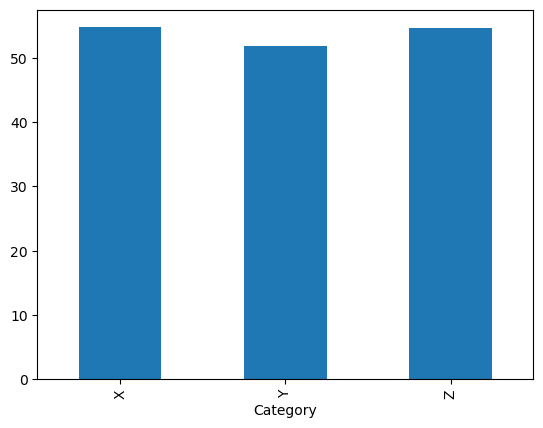

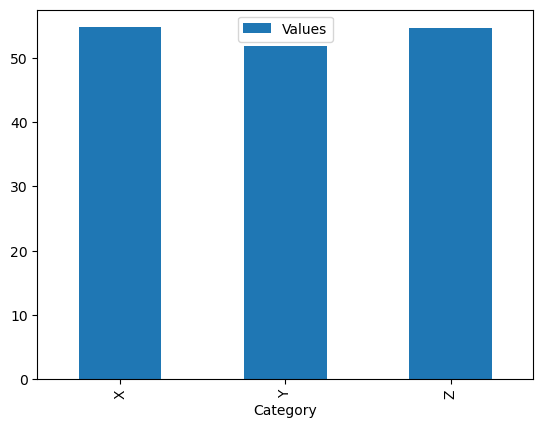

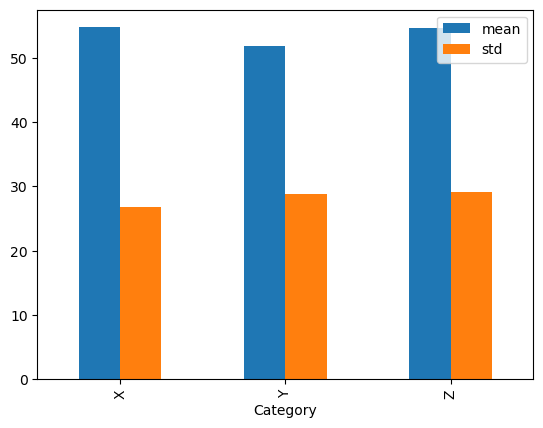

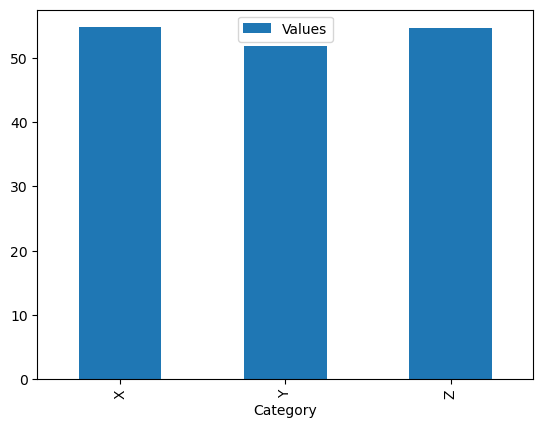

In [25]:
# Group by and plot
df.groupby('Category')['Values'].mean().plot(kind='bar')

# Pivot table plot
pivot_df = df.pivot_table(values='Values', index='Category', aggfunc='mean')
pivot_df.plot(kind='bar')

# Multiple aggregations
df.groupby('Category')['Values'].agg(['mean', 'std']).plot(kind='bar')

# Stacked bar from pivot
pivot_df.plot(kind='bar', stacked=True)


## 7. Formatting and Customization

Since pandas uses matplotlib backend, you can use matplotlib for customization:


<Axes: >

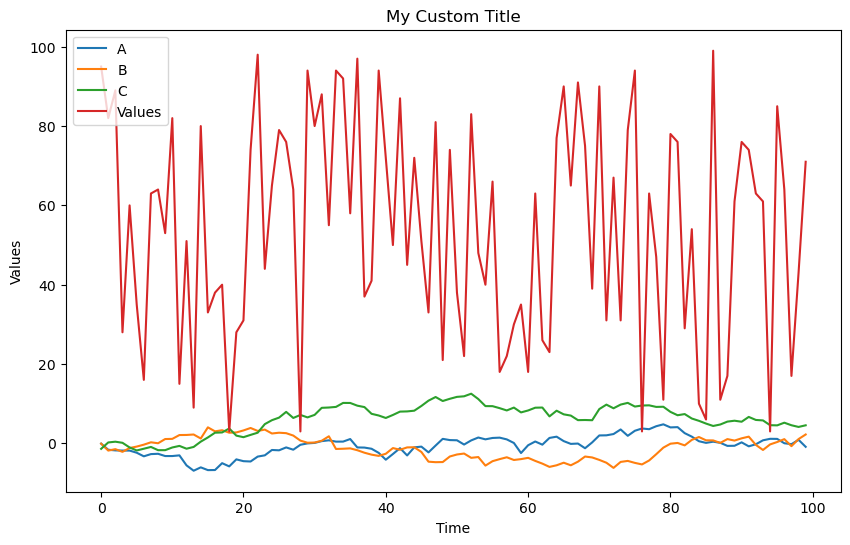

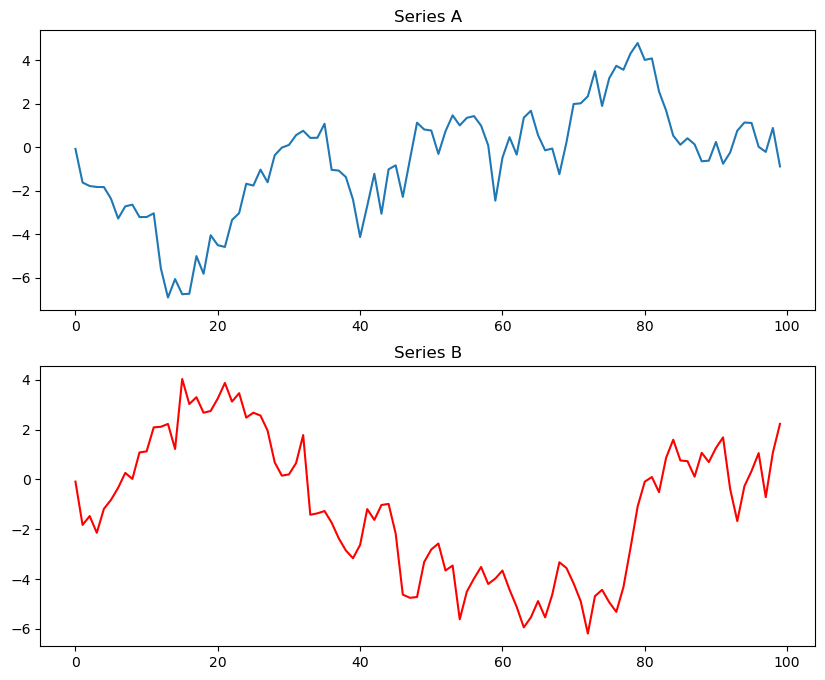

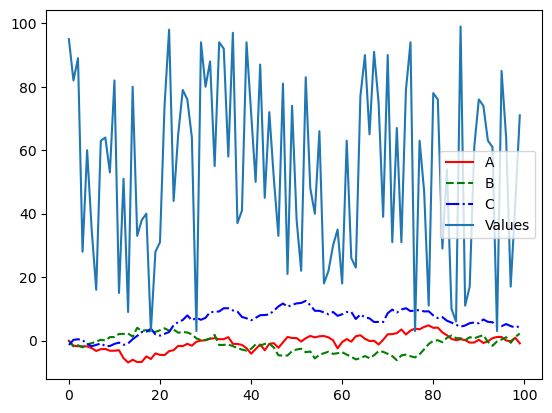

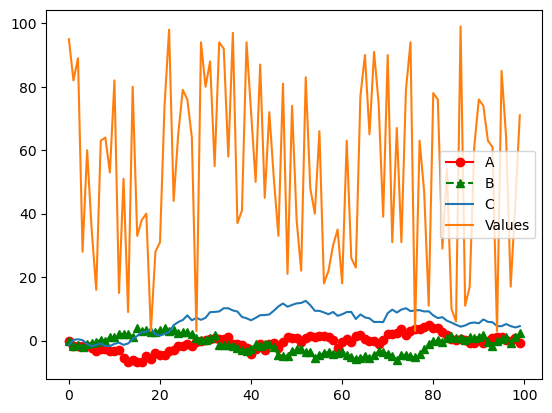

In [26]:
# Get axes object and customize
ax = df.plot(figsize=(10, 6))
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.set_title('My Custom Title')
ax.legend(loc='upper left')

# Multiple plots with different scales
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
df['A'].plot(ax=axes[0], title='Series A')
df['B'].plot(ax=axes[1], title='Series B', color='red')

# Style strings
df.plot(style=['r-', 'g--', 'b-.'])  # Different style per column
df.plot(style={'A': 'ro-', 'B': 'g^--'})  # Dictionary style


## 8. Special Plot Types

### Lag Plot (for autocorrelation)
```python
from pandas.plotting import lag_plot
lag_plot(df['A'])
```

### Autocorrelation Plot
```python
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['A'])
```

### Bootstrap Plot
```python
from pandas.plotting import bootstrap_plot
bootstrap_plot(df['A'], size=50, samples=500)
```

### Scatter Matrix
```python
from pandas.plotting import scatter_matrix
scatter_matrix(df[['A', 'B', 'C']], alpha=0.5, diagonal='kde')
```

### Andrews Curves (for clustering)
```python
from pandas.plotting import andrews_curves
andrews_curves(df, 'Category')
```

### Parallel Coordinates
```python
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, 'Category')
```


## 9. Quick Tips and Best Practices

1. **Chain operations for quick plots**:
   ```python
   df.groupby('Category')['Values'].mean().sort_values().plot(kind='barh')
   ```

2. **Use `value_counts()` for frequency plots**:
   ```python
   df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
   ```

3. **Quick correlation heatmap**:
   ```python
   df.corr().style.background_gradient(cmap='coolwarm')
   ```

4. **Save plots directly**:
   ```python
   ax = df.plot()
   ax.figure.savefig('plot.png', dpi=300, bbox_inches='tight')
   ```

5. **Handle missing data**:
   ```python
   df.interpolate().plot()  # Interpolate missing values
   df.dropna().plot()       # Drop missing values
   ```

## 10. Common Issues and Solutions

| Issue | Solution |
|-------|----------|
| DateTime index not recognized | `df.index = pd.to_datetime(df.index)` |
| Too many legend items | `df.plot(legend=False)` or `ax.legend(ncol=3)` |
| Overlapping x-labels | `df.plot(rot=45)` or `df.plot(x_compat=True)` |
| Different scales obscure data | Use `subplots=True` or `secondary_y=True` |
| Plot too small | `df.plot(figsize=(12, 6))` |
